In [92]:
import networkx as nx
import matplotlib.pyplot as plt
import random 
import numpy as np
from operator import itemgetter

In [3]:
def pow_low(gamma):
    return random.random()**(-1/gamma)

In [64]:
def hierarchical_graph(N):
    g = nx.DiGraph()
    g = g.to_undirected()
    i = 0
    g.add_node(i)
    while(N > 1):
        node = i
        deg = random.randint(1,4)
        for _ in range(deg):
            i+=1
            N-=1
            g.add_edge(node, i)
            if N==0:
                break
    return g

In [183]:
G = hierarchical_graph(10000)

In [185]:
#graph trasmformed to undirected to calculate giant component size
gc = max((G.subgraph(c) for c in nx.connected_components(G.to_undirected())), key=len)
print(f"giant component size = {len(gc)}")

giant component size = 10000


In [142]:
seq = []
for i in range(10000):
    deg = int(pow_low(2.5))
    seq.append(deg)
if(sum(seq)%2 == 0):
    print("OK")
else:
    print("CREATE AGAIN")

OK


In [143]:
G2 = nx.configuration_model(seq)
gc2 = max((G.subgraph(c) for c in nx.connected_components(G2)), key=len)
print(f"giant component size = {len(gc2)}")
print("Numeber of nodes = ", len(G2.nodes()))

giant component size = 1394
Numeber of nodes =  10000


In [186]:
print(f"Graph {'directed' if nx.is_directed(G) else 'undirected'}")
N = G.number_of_nodes()
print(f"Numbers of nodes = {N}")
L = G.number_of_edges()
print(f"Numbers of edges = {L}")

## density
p = nx.density(G)
print(f"Density  = {p}")

## Average Degree 
avg_degree = L/N if nx.is_directed(G) else 2*L/N
print(f"Average Degree = {avg_degree}")

Graph undirected
Numbers of nodes = 10000
Numbers of edges = 9999
Density  = 0.0002
Average Degree = 1.9998


In [178]:
print(f"Graph {'directed' if nx.is_directed(G2) else 'undirected'}")
N = G2.number_of_nodes()
print(f"Numbers of nodes = {N}")
L = G2.number_of_edges()
print(f"Numbers of edges = {L}")

## density
p = nx.density(G2)
print(f"Density  = {p}")

## Average Degree 
avg_degree = L/N if nx.is_directed(G2) else 2*L/N
print(f"Average Degree = {avg_degree}")

Graph undirected
Numbers of nodes = 10000
Numbers of edges = 6724
Density  = 0.00013449344934493449
Average Degree = 1.3448


In [174]:
def attack_degree(graph):
    graph = nx.Graph(graph)
    steps = 0
    degree = dict(graph.degree())
    sorted_degree = sorted(degree.items(), key=itemgetter(1), reverse=True)
    i = 0
    lis = []
    it = []
    while len(graph) > 2:
        graph.remove_node(sorted_degree[i][0])
        steps += 1
        i+=1
        lis.append(len(max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)))
        it.append(steps)
    else:
        return lis, it
    
def attack_clustering(graph):
    graph = nx.Graph(graph)
    steps = 0
    clustering_dict = nx.clustering(graph)
    sorted_clus = sorted(clustering_dict.items(), key=itemgetter(1), reverse=True)
    i = 0
    lis = []
    it = []
    while len(graph) > 2:
        graph.remove_node(sorted_clus[i][0])
        steps += 1
        i+=1
        lis.append(len(max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)))
        it.append(steps)
    else:
        return lis, it

def random_attack(graph):
    graph = nx.Graph(graph)
    steps = 0
    graph_nodes = [n for n in graph.nodes()]
    i = 0
    lis = []
    it = []
    while len(graph)>2:
        node = random.choice(graph_nodes)
        graph.remove_node(node)
        graph_nodes.remove(node)
        steps += 1
        lis.append(len(max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)))
        it.append(steps)
    else:
        return lis, it

In [108]:
def plot(title, ylabel, xlabel, x, y):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(x, y)


Starting attacks on Hierarchical model


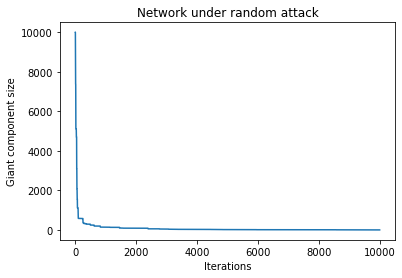

In [206]:
print ('Starting attacks on Hierarchical model')

giant, iterations = random_attack(G)
plot("Network under random attack", 'Giant component size', 'Iterations', giant, iterations)

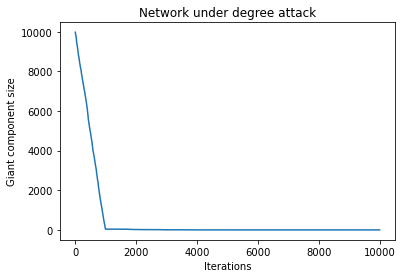

In [191]:
giant2, iterations2 #= attack_degree(G)
plot("Network under degree attack", 'Giant component size', 'Iterations', giant2, iterations2)

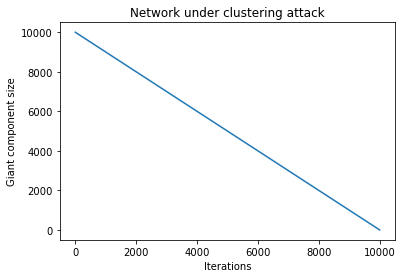

In [192]:
giant3, iterations3 #= attack_clustering(G)
plot("Network under clustering attack", 'Giant component size', 'Iterations', giant3, iterations3)

Starting attacks on Configuration model


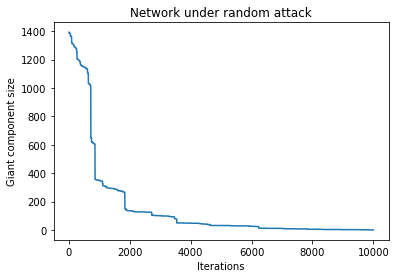

In [188]:
print ('Starting attacks on Configuration model')

giant, iterations #= random_attack(G2)
plot("Network under random attack", 'Giant component size', 'Iterations', giant, iterations)

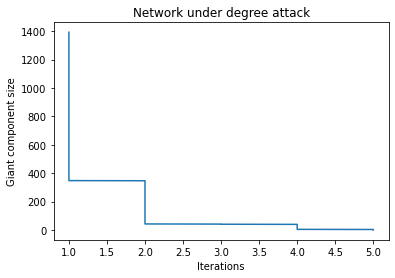

In [202]:
giant2, iterations2 #= attack_degree(gc2)
plot("Network under degree attack", 'Giant component size', 'Iterations', iterations2, giant2)

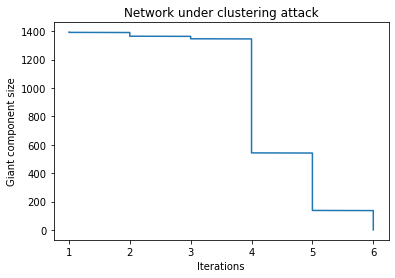

In [205]:
giant3, iterations3 #= attack_clustering(gc2)
plot("Network under clustering attack", 'Giant component size', 'Iterations', iterations3, giant3)

In [171]:
#upload my graph
Gnutella = nx.read_edgelist('p2p-Gnutella08.txt', create_using=nx.DiGraph(), nodetype=int)

In [172]:
ggc = max((Gnutella.subgraph(c) for c in nx.connected_components(Gnutella.to_undirected())), key=len)

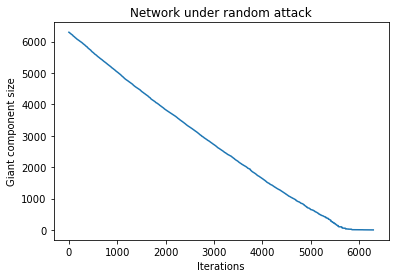

In [197]:
g, i = random_attack(ggc)
plot("Network under random attack", 'Giant component size', 'Iterations', g, i)

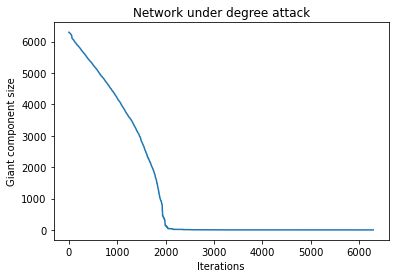

In [198]:
g2, i2 #= attack_degree(ggc)
plot("Network under degree attack", 'Giant component size', 'Iterations', g2, i2)

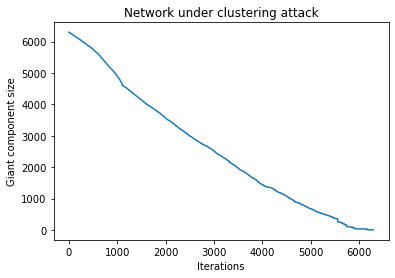

In [199]:
g3, i3 #= attack_clustering(ggc)
plot("Network under clustering attack", 'Giant component size', 'Iterations', g3, i3)